In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from thesis.io import gyre, fgong
from thesis.physics import sound_speed, acoustic_depth
from thesis.calculus import differentiate

from scipy.optimize import basinhopping as scipy_basinhopping

In [2]:
root_path = os.path.expanduser("~/OneDrive/Data/MESA/solar_models/y0.28/")
profile_name = "profile"

filename = os.path.join(root_path, ".".join([profile_name, "data", "FGONG"]))
gong = fgong.load_fgong(filename)
gong

<xarray.Dataset>
Dimensions:       (x: 1046)
Coordinates:
  * x             (x) float64 0.0 0.0009072 0.001143 ... 1.001 1.001 1.001
Data variables: (12/36)
    r             (x) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    ln_q          (x) float64 -708.4 -16.36 -15.67 -14.98 ... 0.0 0.0 0.0 0.0
    T             (x) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    P             (x) float64 2.22e+17 2.22e+17 2.22e+17 ... 95.79 93.64 91.76
    rho           (x) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    X             (x) float64 0.3762 0.3762 0.3762 ... 0.7304 0.7304 0.7304
    ...            ...
    X_Li7         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_Be7         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_N15         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O17         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_O18         (x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    X_Ne20        (x) float64 0.002143 0.002143 0.002143 ... 0.001851 0.001851
Attributes: (12/15)
    M:               1.9884098706980504e+33
    R:               70538857450.55437
    L:               3.695049456876695e+33
    initial_Z:       0.02
    initial_X:       0.7
    alpha_MLT:       1.9
    ...              ...
    lambda_surf:     0.0
    d2lnPc_dlnr2:    -125.502754776413
    d2lnrhoc_dlnr2:  -163.89137578671765
    star_age:        4073344465.7814794
    Teff:            5681.793600417881
    G:               6.6743e-08

In [3]:
summary_filename = os.path.join(root_path, profile_name, "summary.h5")
detail_filenames = glob(os.path.join(root_path, profile_name, "detail*"))

pulse = gyre.load_output(summary_filename, detail_filenames)
pulse

<xarray.Dataset>
Dimensions:  (n_pg: 36, l: 3, x: 1046)
Coordinates:
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
  * l        (l) int64 0 1 2
  * x        (x) float64 0.0 0.0009072 0.001143 0.00144 ... 1.001 1.001 1.001
Data variables:
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    freq     (n_pg, l) complex128 (255.42893986791924+0j) ... (nan+nanj)
    omega    (n_pg, l) complex128 (2.6099776215242243+0j) ... (nan+nanj)
    As       (x, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    V_2      (x, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (x, n_pg, l) float64 0.009557 nan 0.009557 ... 1.003 nan nan
    xi_h     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
    xi_r     (x, n_pg, l) complex128 0j (nan+nanj) 0j ... (nan+nanj) (nan+nanj)
Attributes:
    freq_units:  UHZ
    label:

In [4]:
data = gong.merge(pulse, combine_attrs="drop_conflicts")
data

<xarray.Dataset>
Dimensions:       (x: 1046, n_pg: 36, l: 3)
Coordinates:
  * x             (x) float64 0.0 0.0009072 0.001143 ... 1.001 1.001 1.001
  * n_pg          (n_pg) int64 1 2 3 4 5 6 7 8 9 ... 28 29 30 31 32 33 34 35 36
  * l             (l) int64 0 1 2
Data variables: (12/44)
    r             (x) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    ln_q          (x) float64 -708.4 -16.36 -15.67 -14.98 ... 0.0 0.0 0.0 0.0
    T             (x) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    P             (x) float64 2.22e+17 2.22e+17 2.22e+17 ... 95.79 93.64 91.76
    rho           (x) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    X             (x) float64 0.3762 0.3762 0.3762 ... 0.7304 0.7304 0.7304
    ...            ...
    omega         (n_pg, l) complex128 (2.6099776215242243+0j) ... (nan+nanj)
    As            (x, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    V_2           (x, n_pg, l) float64 125.5 nan 125.5 ... 5.896e+03 nan nan
    c_1           (x, n_pg, l) float64 0.009557 nan 0.009557 ... 1.003 nan nan
    xi_h          (x, n_pg, l) complex128 0j (nan+nanj) ... (nan+nanj)
    xi_r          (x, n_pg, l) complex128 0j (nan+nanj) ... (nan+nanj)
Attributes: (12/17)
    M:               1.9884098706980504e+33
    R:               70538857450.55437
    L:               3.695049456876695e+33
    initial_Z:       0.02
    initial_X:       0.7
    alpha_MLT:       1.9
    ...              ...
    d2lnrhoc_dlnr2:  -163.89137578671765
    star_age:        4073344465.7814794
    Teff:            5681.793600417881
    G:               6.6743e-08
    freq_units:      UHZ
    label:

In [5]:
data["cs"] = sound_speed(data.Gamma_1, data.P, data.rho)
data["tau"] = acoustic_depth(data.r, data.cs)
tau0 = data["tau"].max()
nu0 = 5e5 / tau0
print(f"Acoustic radius is {tau0:.2f} s")
print(f"Characteristic frequency is {nu0:.2f} uHz")

Acoustic radius is 3710.25 s
Characteristic frequency is 134.76 uHz


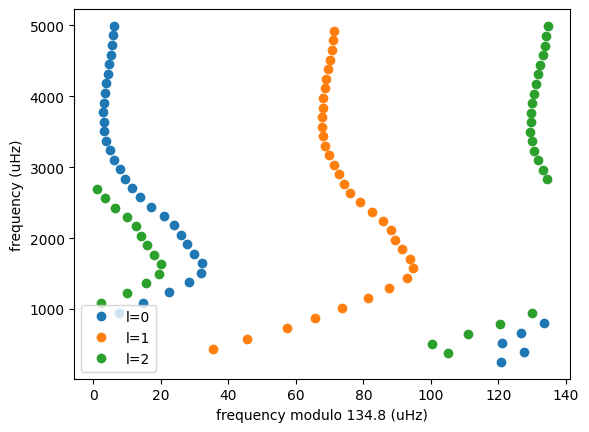

In [6]:
fig = plt.figure()

freq_mod = data.freq.real%nu0
for j in data.l:
    plt.plot(freq_mod.sel(l=j), data.freq.real.sel(l=j), 'o', color=f'C{j:d}', label=f'l={j:d}')
#     plt.plot(freq_mod.sel(l=j)-nu0, ds.freq.real.sel(l=j), 'o', color=f'C{j:d}')

plt.xlabel(f'frequency modulo {nu0:.1f} (uHz)')
plt.ylabel('frequency (uHz)')
plt.legend();

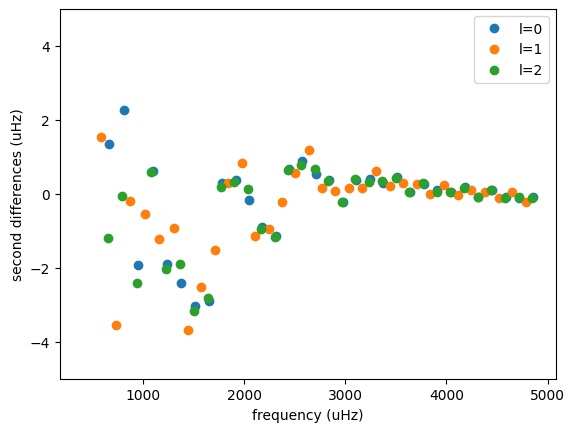

In [7]:
plt.figure()

d2nu = data.freq.real[:-2].values - 2 * data.freq.real[1:-1].values + data.freq.real[2:].values

for j in range(3):
    plt.plot(data.freq.real[1:-1, j], d2nu[:, j], 'o', color=f'C{j:d}', label=f'l={data.l[j]:d}')

plt.xlabel('frequency (uHz)')
plt.ylabel('second differences (uHz)')
plt.ylim(-5, 5)
plt.legend();

In [8]:
import jax
import jax.numpy as jnp
import jax.tree_util as tu

from jax import random
jax.config.update("jax_enable_x64", True)

In [9]:
def _oscillation(nu, tau, phi):
    return jnp.sin(4 * jnp.pi * tau * nu + phi)

def factorial_ratio(n, m):
    # returns n!/m! where m must be less than n
    if n < m:
        raise ValueError("Variable 'n' is less than 'm'.")
    return jnp.prod(jnp.arange(m+1, n+1))
    # return np.prod(np.arange(m+1, n+1))

In [10]:
def smooth_component(params, n):
    return jnp.polyval(jnp.array(params["coeff"][::-1]), n)
    # num_coeff = params["coeff"].shape[-1]
    # return params["coeff"] * n[:, None]**jnp.arange(num_coeff)

def helium_amp(params, nu):
    return jnp.exp(params["log_a_he"]) * nu \
        * jnp.exp(- jnp.exp(params["log_b_he"]) * nu**2)

def helium_osc(params, nu):
    return _oscillation(nu, jnp.exp(params["log_tau_he"]), params["phi_he"])

def helium_glitch(params, nu):
    return helium_amp(params, nu) * helium_osc(params, nu)

def bcz_amp(params, nu):
    return jnp.exp(params["log_a_cz"]) / nu**2

def bcz_osc(params, nu):
    return _oscillation(nu, jnp.exp(params["log_tau_cz"]), params["phi_cz"])

def bcz_glitch(params, nu):
    return bcz_amp(params, nu) * bcz_osc(params, nu)

def glitch(params, nu):
    return helium_glitch(params, nu) + bcz_glitch(params, nu)

In [54]:
def model(params, n):
    nu_sm = smooth_component(params, n)
    dnu = glitch(params, nu_sm)
    return nu_sm + dnu

def regularise(params, n, num_deriv=3):
    num_coeff = len(params["coeff"])
    reg = jnp.zeros(n.shape)
    for k in range(num_deriv, num_coeff):
        reg += factorial_ratio(k, num_coeff-num_deriv-1) \
            * params["coeff"][k] * n**(k-num_deriv)
    return reg

def least_square(params, n, nu, reg=7.0):
#     return jnp.sum((nu - model(params, n))**2 + (reg * regularise(params, n))**2)
    return jnp.sum((nu - model(params, n))**2 + jnp.exp(2*params["log_reg"]) * regularise(params, n)**2)

def chi_square(params, n, nu, sigma, reg=7.0):
    return jnp.sum(((nu - model(params, n))/sigma)**2 + (reg * regularise(params, n))**2)

In [55]:
def unfurl(func):
    def wrapper(leaves, treedef, *args, **kwargs):
        params = tu.tree_unflatten(treedef, leaves)
        return func(params, *args, **kwargs)
    return wrapper

In [106]:
def basinhopping(fun, init_params, **kwargs):
    x0, treedef = tu.tree_flatten(init_params)
    
    def func(x, *args):
        return float(unfurl(jax.jit(fun))(x, treedef, *args))
    
    fun_grad = jax.jit(jax.grad(fun))

    def jac(x, *args):
        g = unfurl(fun_grad)(x, treedef, *args)
        g_flat, _ = tu.tree_flatten(g)
        return np.array(g_flat)
    
    minimizer_kwargs = kwargs.pop("minimizer_kwargs", {})
    if "jac" not in minimizer_kwargs:
        minimizer_kwargs["jac"] = jac
    
    _take_step = kwargs.pop("take_step", None)
    if callable(_take_step):
        def take_step(x):
            s = unfurl(jax.jit(_take_step))(x, treedef)
            s_flat, _ = tu.tree_flatten(s)
            return np.array(s_flat)
    else:
        take_step = _take_step

    result = scipy_basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs, take_step=take_step, **kwargs)
    result["params"] = tu.tree_unflatten(treedef, result.x)
    return result

In [107]:
rng = random.PRNGKey(0)

In [108]:
l = 0
n = np.arange(14, 26)
nu = data.freq.real.sel(l=l, n_pg=n).values
nu_unc = 0.1

delta_nu, alpha = np.polyfit(n, nu, 1)
epsilon = alpha/delta_nu

print(f"{delta_nu=:.2f}")
print(f"num_of_n={n.shape[0]}")

delta_nu=132.61
num_of_n=12


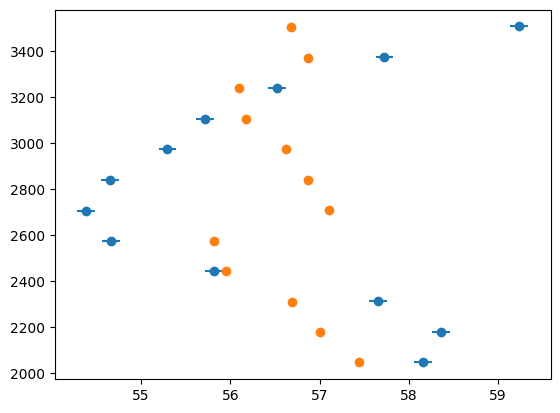

In [109]:
init_params = {
    "coeff": [alpha, delta_nu, 0., 0., 0.],
    "log_a_he": np.log(1e-3),
    "log_b_he": np.log(2e-7),
    "log_tau_he": np.log(0.2/2/delta_nu),
    "phi_he": 0.0,
    "log_a_cz": np.log(2e6),
    "log_tau_cz": np.log(0.6/2/delta_nu),
    "phi_cz": 0.0,
    "log_reg": 0.0,
}

nu_init = model(init_params, n)

plt.errorbar(nu%delta_nu, nu, xerr=nu_unc, fmt="o")
plt.plot(nu_init%delta_nu, nu_init, "o")

In [29]:
# lower = {
#     "coeff": [-jnp.inf] * len(init_params["coeff"]),
#     "log_a_he": -jnp.inf,
#     "log_b_he": -jnp.inf,
#     "log_tau_he": jnp.log(0.15/2/delta_nu),
#     "phi_he": -jnp.pi,
#     "log_a_cz": -jnp.inf,
#     "log_tau_cz": jnp.log(0.5/2/delta_nu),
#     "phi_cz": -jnp.pi,
#     "log_reg": -jnp.inf,
# }

# upper = {
#     "coeff": [jnp.inf] * len(init_params["coeff"]),
#     "log_a_he": jnp.inf,
#     "log_b_he": jnp.inf,
#     "log_tau_he": jnp.log(0.25/2/delta_nu),
#     "phi_he": jnp.pi,
#     "log_a_cz": jnp.inf,
#     "log_tau_cz": jnp.log(0.7/2/delta_nu),
#     "phi_cz": jnp.pi,
#     "log_reg": jnp.inf,
# }

# bounds = (lower, upper)

In [30]:
# step_sizes = {
#     "coeff": [10., 10., 1.0, 0.1, 0.05],
#     "log_a_he": 1.0,
#     "log_b_he": 1.0,
#     "log_tau_he": 1.0,
#     "phi_he": 1.0,
#     "log_a_cz": 1.0,
#     "log_tau_cz": 1.0,
#     "phi_cz": 1.0,
#     "log_reg": 1.0,
# }

# def random_split_tree_like(key, x=None, treedef=None):
#     if treedef is None:
#         treedef = jax.tree_util.tree_structure(x)
#     keys = jax.random.split(key, treedef.num_leaves)
#     return jax.tree_util.tree_unflatten(treedef, keys)


# class StepTaker:
#     def __init__(self, key, step_sizes, bounds=None, stepsize_factor=1.0):
#         self.key = key
#         self.step_sizes = step_sizes
#         self.stepsize = stepsize_factor

#         if bounds is None:
#             lower = jax.tree_map(lambda _: -jnp.inf, step_sizes)
#             upper = jax.tree_map(lambda _: jnp.inf, step_sizes)
#             bounds = (lower, upper)
#         self.bounds = bounds

#     def __call__(self, params):
#         self.key, key = random.split(self.key)
#         keys = random_split_tree_like(key, params)
# #         minval = jnp.maximum(l - x, s)
        
#         return jax.tree_map(
#             lambda k, x, s, l, u: x + random.uniform(
#                 k, 
#                 minval=jnp.maximum(l - x, -s*self.stepsize), 
#                 maxval=jnp.minimum(u - x, s*self.stepsize)
#             ), 
#             keys,
#             params,
#             self.step_sizes, 
#             *self.bounds,
#         )

In [31]:
# from scipy.optimize import Bounds

In [32]:
# take_step = StepTaker(rng, step_sizes, bounds)

In [33]:
# lb, ub = map(tu.tree_leaves, bounds)
# bb = Bounds(lb, ub)

In [120]:
sol = basinhopping(least_square, init_params, niter=1000, niter_success=100,
                   T=0.1,
                    minimizer_kwargs={
                            "method": "BFGS", 
                            "args": (n, nu),
                       })

In [121]:
sol

                    message: ['success condition satisfied']
                    success: True
                        fun: 1.4020002852723984e-19
                          x: [ 7.205e+01  1.606e+02 ... -2.646e+01
                               1.459e+01]
                        nit: 107
      minimization_failures: 100
                       nfev: 10584
                       njev: 10539
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 1.4020002852723984e-19
                                    x: [ 7.205e+01  1.606e+02 ...
                                        -2.646e+01  1.459e+01]
                                  nit: 180
                                  jac: [ 2.801e-11  3.579e-10 ...
                                         2.340e-12  2.485e-11]
                             hess_inv: [[ 3.827e+07 -7.801e+06 ...
                

In [34]:
from tqdm import tqdm

In [85]:
num_rlns = 10
params = []
for i in tqdm(range(num_rlns)):
    rng, key = random.split(rng)
    nu_rln = nu + nu_unc * random.normal(key, shape=nu.shape)
    sol = basinhopping(least_square, init_params, niter=1000, niter_success=10,
                               minimizer_kwargs={
                                   "method": "BFGS", 
                                   "args": (n, nu_rln), 
                               })
    params.append(sol.params)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.96s/it]


In [89]:
jax.tree_map(lambda *args: jnp.stack(args, axis=-1), *params)

{'coeff': [Array([-441.42902801,  337.85116961,  499.64344544,  -89.56391241,
          366.80326648,  565.31862096, -454.85832179,  804.27916173,
          655.06667905, -127.37037484], dtype=float64),
  Array([270.74324011, 107.7776123 ,  78.99416854, 197.55973769,
         102.50088162,  65.48573555, 271.80572115,  16.81338574,
          45.32251943, 206.04698013], dtype=float64),
  Array([-11.03071166,   1.58070295,   3.44507214,  -5.40067314,
           1.93980766,   4.49290562, -10.98116297,   8.17475504,
           6.14306748,  -6.096093  ], dtype=float64),
  Array([ 0.38087837, -0.04752276, -0.09933015,  0.1908892 , -0.05830618,
         -0.13553569,  0.37482664, -0.25813872, -0.19417497,  0.2155904 ],      dtype=float64),
  Array([-0.00480628,  0.00058765,  0.00110423, -0.00243171,  0.00070801,
          0.00157245, -0.0046759 ,  0.00308913,  0.002339  , -0.00275316],      dtype=float64)],
 'log_a_cz': Array([13.40079494, 13.47059543, 13.35441562, 15.2641307 , 13.6193959 ,
   

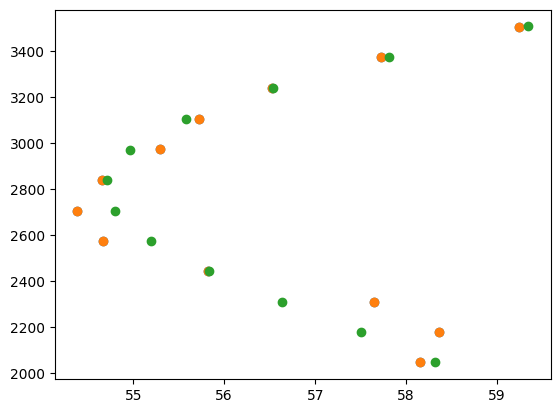

In [122]:
nu_fit = model(sol.params, n)
nu_sm = smooth_component(sol.params, n)

plt.plot(nu%delta_nu, nu, "o")
plt.plot(nu_fit%delta_nu, nu_fit, "o")
plt.plot(nu_sm%delta_nu, nu_sm, "o")

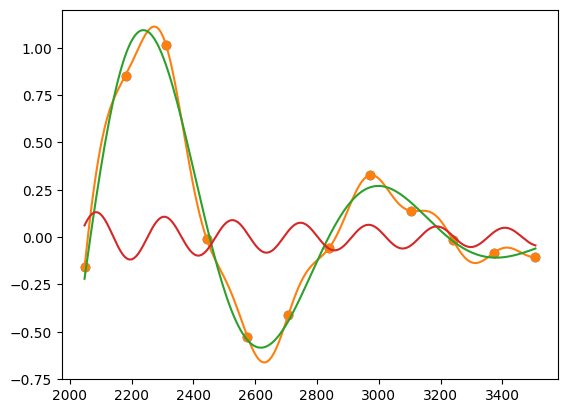

In [123]:
nu_pred = np.linspace(nu.min(), nu.max(), 201)
dnu_pred = glitch(sol.params, nu_pred)

dnu_fit = glitch(sol.params, nu_sm)

plt.plot(nu, nu-nu_sm, "o")
plt.plot(nu, dnu_fit, "o")
plt.plot(nu_pred, dnu_pred, c="C1")

plt.plot(nu_pred, helium_glitch(sol.params, nu_pred))
plt.plot(nu_pred, bcz_glitch(sol.params, nu_pred))

(array([2., 1., 1., 1., 2., 1., 0., 1., 1., 2.]),
 array([-4.54747351e-12, -3.77440301e-12, -3.00133252e-12, -2.22826202e-12,
        -1.45519152e-12, -6.82121026e-13,  9.09494702e-14,  8.64019967e-13,
         1.63709046e-12,  2.41016096e-12,  3.18323146e-12]),
 [<matplotlib.patches.Polygon at 0x12cb3db80>])

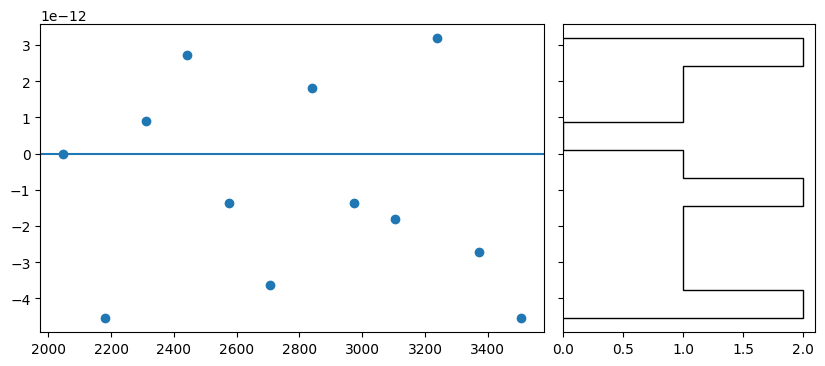

In [114]:
res = nu - nu_fit
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True,
                         gridspec_kw={"wspace": 0.05, "width_ratios": [2, 1]})

ax = axes[0]
ax.plot(nu, res, "o")
    
ax.axhline()
# ax.legend()

ax = axes[1]
ax.hist(res, orientation="horizontal", color="k", histtype="step")

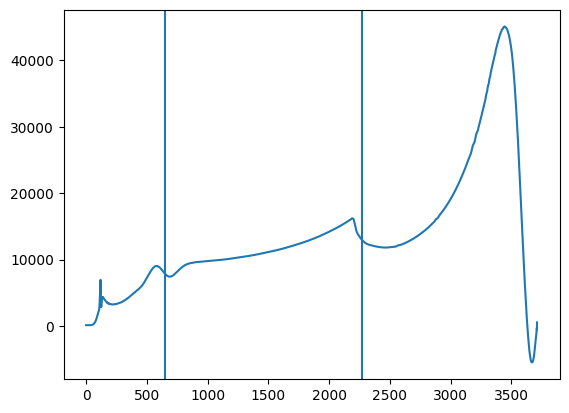

In [115]:
plt.plot(data.tau, differentiate(data.cs, data.tau))

plt.axvline(np.exp(sol.params["log_tau_he"])*1e6)
plt.axvline(np.exp(sol.params["log_tau_cz"])*1e6)

repeat for lots of initial values and pick best chi2